In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
#Unzipping the file
!tar -xf /content/drive/My\ Drive/fer2013.tar.gz

In [3]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
#cpu - gpu configuration
config = tf.ConfigProto( device_count = {'GPU': 0 , 'CPU': 56} ) #max: 1 gpu, 56 cpu
sess = tf.Session(config=config) 
keras.backend.set_session(sess)
#------------------------------
#variables
num_classes = 7 #angry, disgust, fear, happy, sad, surprise, neutral
batch_size = 256
epochs = 30
#------------------------------
#read kaggle facial expression recognition challenge dataset (fer2013.csv)
#https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge

In [5]:

with open("fer2013/fer2013.csv") as f:
  content = f.readlines()

lines = np.array(content)

num_of_instances = lines.size
print("number of instances: ",num_of_instances)
print("instance length: ",len(lines[1].split(",")[1].split(" ")))

#------------------------------
#initialize trainset and test set
x_train, y_train, x_test, y_test = [], [], [], []

#------------------------------
#transfer train and test set data
for i in range(1,num_of_instances):
    try:
        emotion, img, usage = lines[i].split(",")
          
        val = img.split(" ")
            
        pixels = np.array(val, 'float32')
        
        emotion = keras.utils.to_categorical(emotion, num_classes)
    
        if 'Training' in usage:
            y_train.append(emotion)
            x_train.append(pixels)
        elif 'PublicTest' in usage:
            y_test.append(emotion)
            x_test.append(pixels)
    except:
      print("", end="")

number of instances:  35888
instance length:  2304


In [6]:
#data transformation for train and test sets
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')

x_train /= 255 #normalize inputs between [0, 1]
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

28709 train samples
3589 test samples


In [7]:





#------------------------------
#construct CNN structure
model = Sequential()

#1st convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))
#------------------------------
#batch process
gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=batch_size)

#------------------------------

model.compile(loss='categorical_crossentropy'
    , optimizer=keras.optimizers.Adam()
    , metrics=['accuracy']
)

#------------------------------

fit = True

if fit == True:
	#model.fit_generator(x_train, y_train, epochs=epochs) #train for all trainset
	model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs) #train for randomly selected one
else:
	model.load_weights('/data/facial_expression_model_weights.h5') #load weights
	
#------------------------------
"""
#overall evaluation
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', 100*score[1])
"""
#------------------------------
#function for drawing bar chart for emotion preditions
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/30




256/256 [==============================] - 473s 2s/step - loss: 1.8033 - acc: 0.2527
Epoch 2/30
256/256 [==============================] - 478s 2s/step - loss: 1.5694 - acc: 0.3787
Epoch 3/30
256/256 [==============================] - 477s 2s/step - loss: 1.3810 - acc: 0.4679
Epoch 4/30
256/256 [==============================] - 467s 2s/step - loss: 1.2770 - acc: 0.5137
Epoch 5/30
256/256 [==============================] - 460s 2s/step - loss: 1.1937 - acc: 0.5448
Epoch 6/30
256/256 [==============================] - 455s 2s/step - loss: 1.1226 - acc: 0.5751
Epoch 7/30
256/256 [==============================] - 460s 2s/step - loss: 1.0643 - acc: 0.5956
Epoch 8/30
256/256 [==============================] - 460s 2s/step - loss: 0.9996 - acc: 0.6214
Epoch 9/3

In [0]:
#Saving the model
model.save('model25.h5')

In [11]:
#Evaluation
train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])
 
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

Train loss: 0.06316541704524428
Train accuracy: 98.19568776341913
Test loss: 3.0279559742344824
Test accuracy: 57.70409584884093


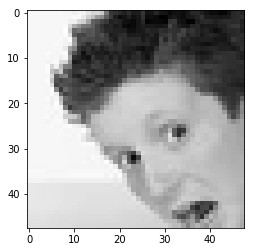

[2.73186813e-16 1.02558905e-26 2.06864994e-12 5.69843214e-05
 9.82411343e-15 9.99943018e-01 2.88478158e-10]


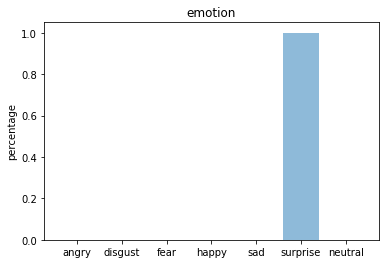

----------------------------------------------


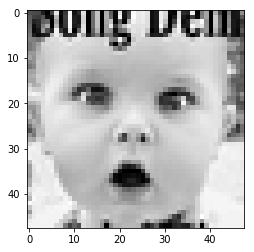

[3.61832564e-10 3.05469425e-24 1.30840675e-23 1.47808401e-16
 1.40134928e-25 1.00000000e+00 2.93272783e-20]


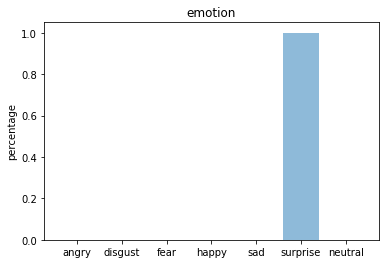

----------------------------------------------


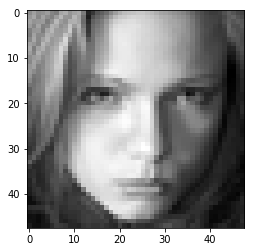

[1.0908201e-08 4.6984303e-19 7.0951521e-01 5.1636679e-13 2.8875014e-01
 4.7240658e-16 1.7346326e-03]


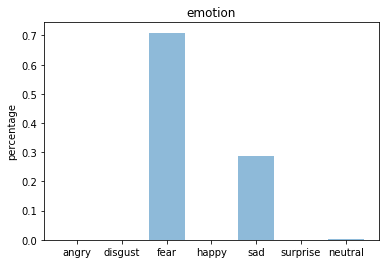

----------------------------------------------


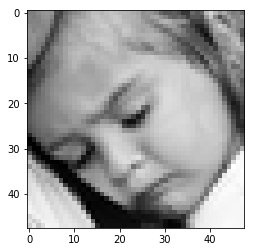

[4.0691299e-09 6.7543729e-14 9.9927443e-01 4.4011887e-09 1.6841693e-06
 7.2158437e-04 2.3663299e-06]


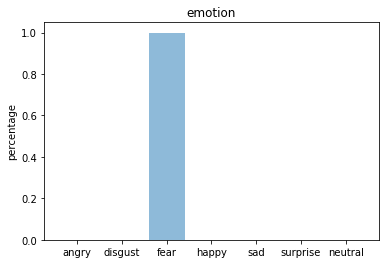

----------------------------------------------


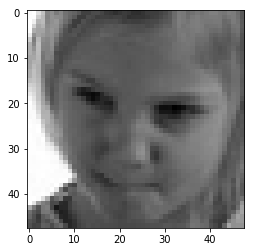

[9.0874696e-01 1.2597452e-04 6.4193811e-03 2.9368637e-02 5.1515266e-02
 1.2704164e-04 3.6967262e-03]


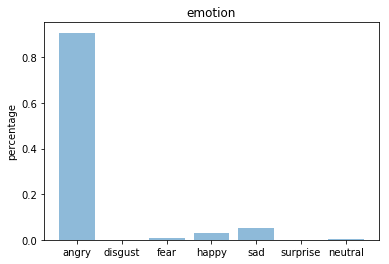

----------------------------------------------


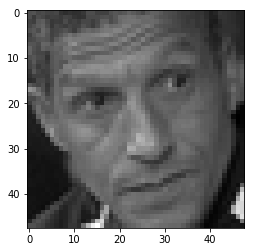

[7.5511080e-01 2.5221379e-07 3.6567122e-02 8.6839637e-03 1.2322409e-01
 4.2962587e-05 7.6370880e-02]


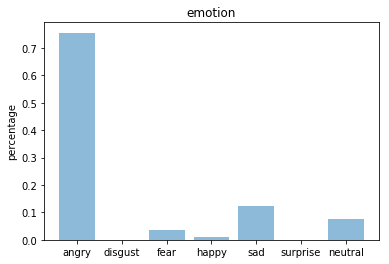

----------------------------------------------


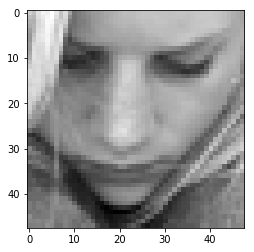

[5.2576685e-19 1.0596291e-27 3.1243495e-03 4.5582684e-13 9.9687564e-01
 7.9095459e-26 4.3906666e-12]


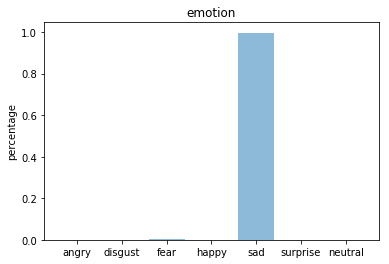

----------------------------------------------


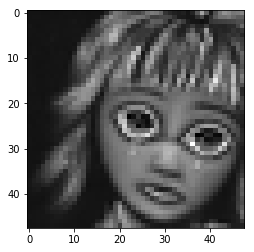

[1.2254903e-04 4.1810472e-11 4.2479604e-01 8.1480388e-04 2.1855644e-04
 8.7033594e-03 5.6534469e-01]


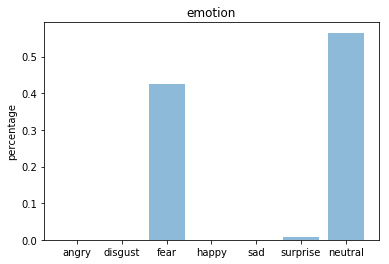

----------------------------------------------


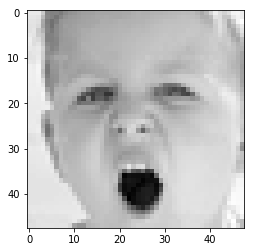

[9.99558628e-01 1.52874723e-20 4.41376178e-04 3.84137078e-09
 1.30321601e-14 4.24861346e-09 1.29699576e-08]


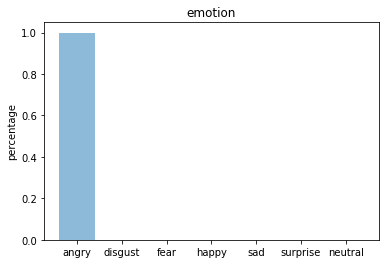

----------------------------------------------


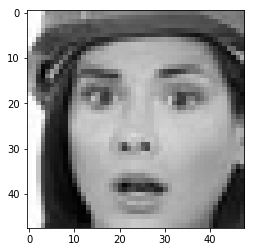

[2.5985177e-08 1.1981969e-14 1.5194927e-04 1.1983514e-08 1.4345465e-10
 9.9984801e-01 5.7467837e-12]


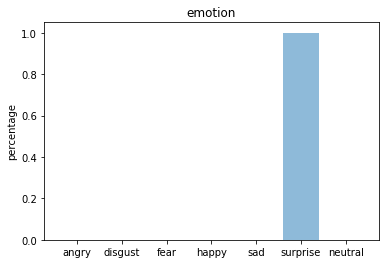

----------------------------------------------


In [13]:
monitor_testset_results = True

if monitor_testset_results == True:
	#make predictions for test set
	predictions = model.predict(x_test)

	index = 0
	for i in predictions:
		if index < 30 and index >= 20:
			#print(i) #predicted scores
			#print(y_test[index]) #actual scores
			
			testing_img = np.array(x_test[index], 'float32')
			testing_img = testing_img.reshape([48, 48]);
			
			plt.gray()
			plt.imshow(testing_img)
			plt.show()
			
			print(i)
			
			emotion_analysis(i)
			print("----------------------------------------------")
		index = index + 1

In [0]:
from keras.models import load_model
model = load_model('model25.h5')


In [0]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

In [43]:
from google.colab import files
uploaded = files.upload()

Saving 27935534_1558042977620428_1088891313_n.jpg to 27935534_1558042977620428_1088891313_n (1).jpg


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


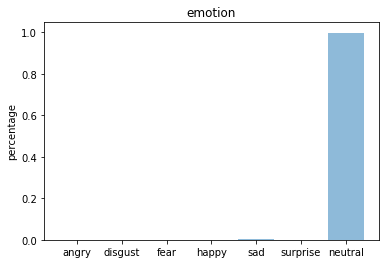

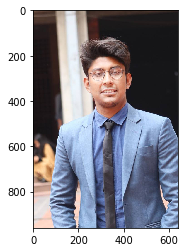

In [44]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


file = '27935534_1558042977620428_1088891313_n.jpg'
true_image = image.load_img(file)
img = image.load_img(file, grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(true_image)
plt.show()